In [49]:
import os
import numpy as np
import concurrent.futures
import logging
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import matplotlib.pyplot as plt

# begin of visualization

In [12]:
def plot_rows(data, name):
    """

    Plots each row of a 2D NumPy array as a separate line.


    Args:

      data: A 2D NumPy array where each row is a time series.
    """

    if not isinstance(data, np.ndarray) or data.ndim != 2:

        raise ValueError("Input must be a 2D NumPy array.")

    num_rows = data.shape[0]

    num_cols = data.shape[1]

    # if num_col is not specified, we use arange

    x_values = np.arange(num_cols)

    for i in range(num_rows):

        plt.plot(x_values, data[i, :], label=f"Row {i+1}")

    plt.xlabel("Time Point")

    plt.ylabel("Value")
    plt.title(name)

    plt.grid(True)

    plt.show()

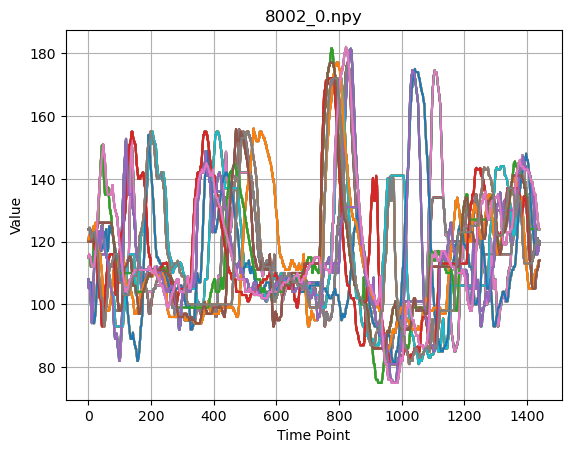

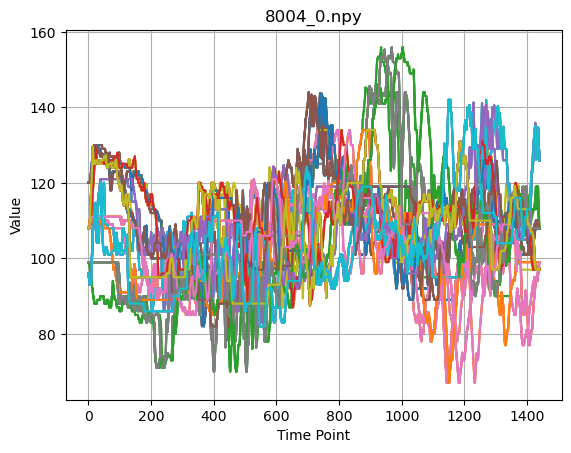

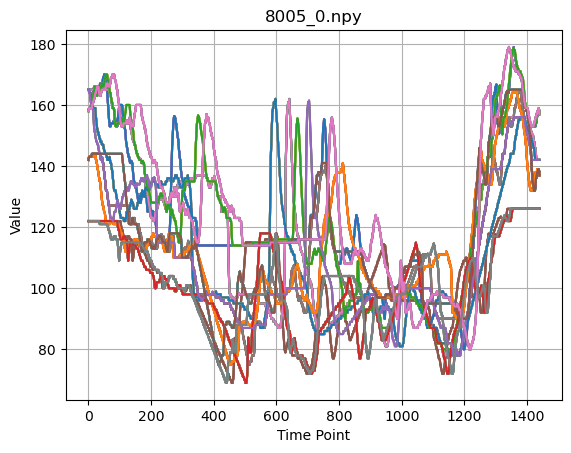

In [13]:
for file in os.listdir("Hall2018_rgw"):
    data = np.load(os.path.join("Hall2018_rgw", file))
    data = data.reshape(-1, 1440)
    plot_rows(data, file)

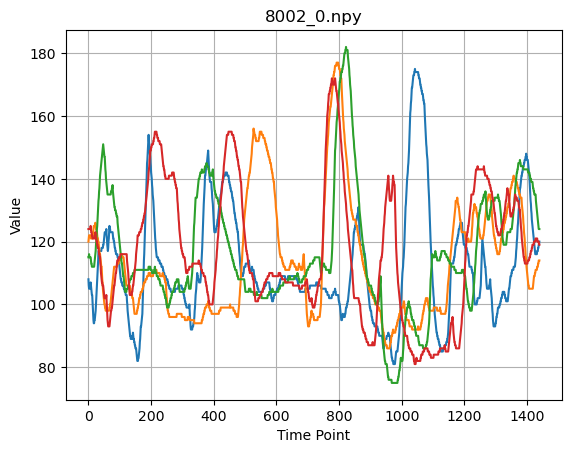

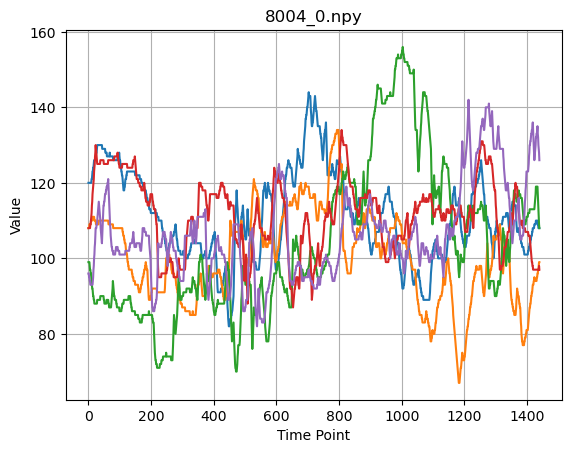

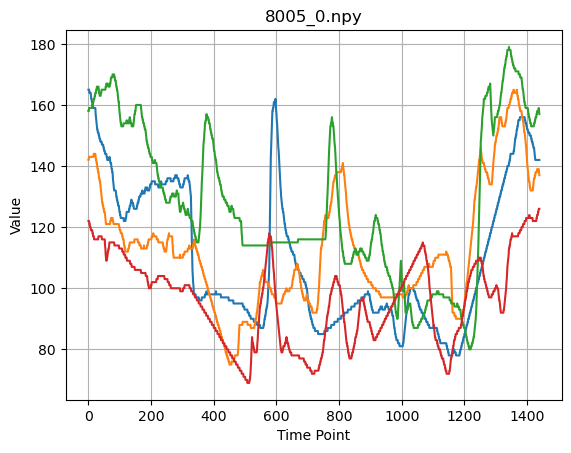

In [14]:
for file in os.listdir("Hall2018"):
    data = np.load(os.path.join("Hall2018", file))
    data = data.reshape(-1, 1440)
    plot_rows(data, file)

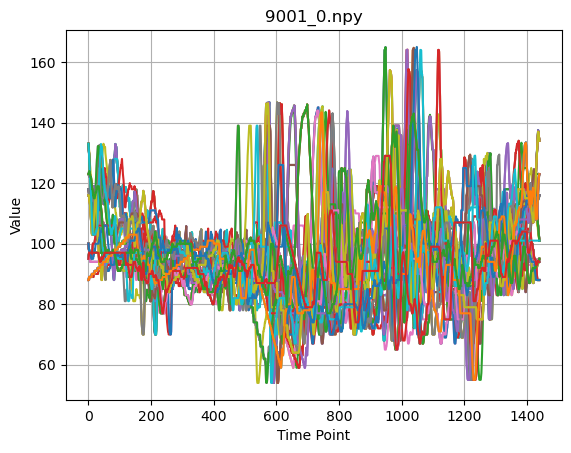

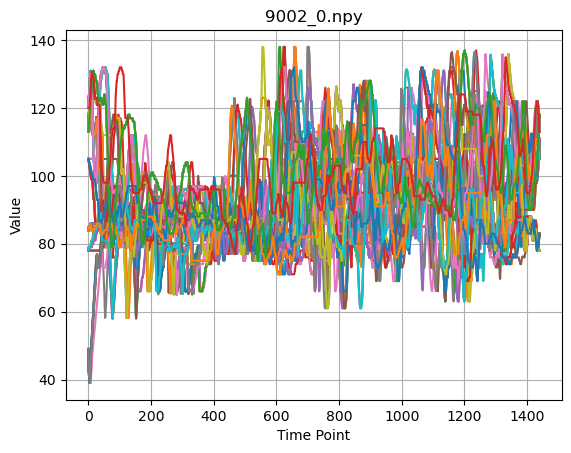

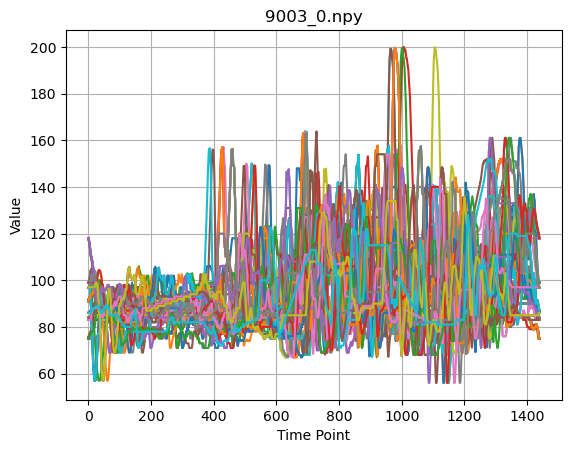

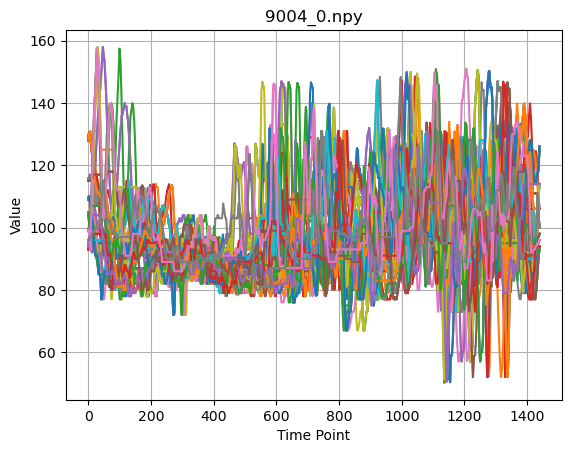

In [15]:
for file in os.listdir("Shah2019_rgw"):
    data = np.load(os.path.join("Shah2019_rgw", file))
    data = data.reshape(-1, 1440)
    plot_rows(data, file)

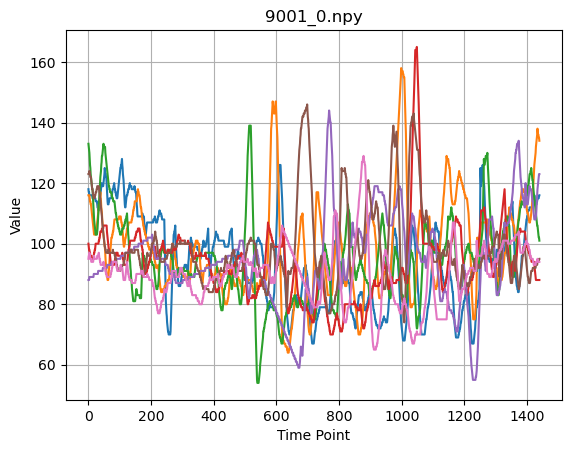

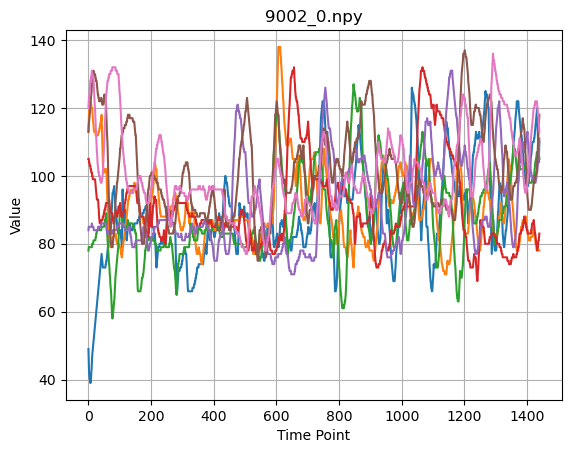

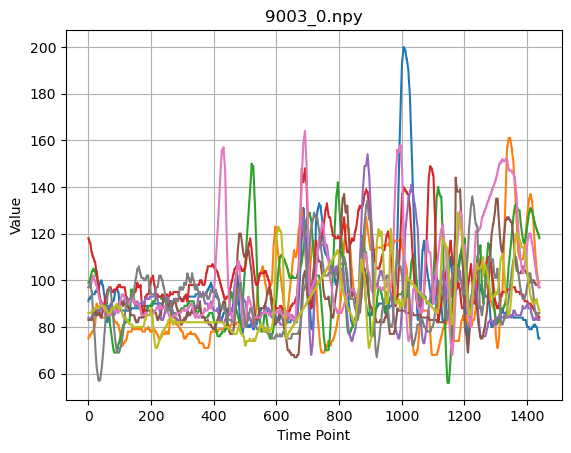

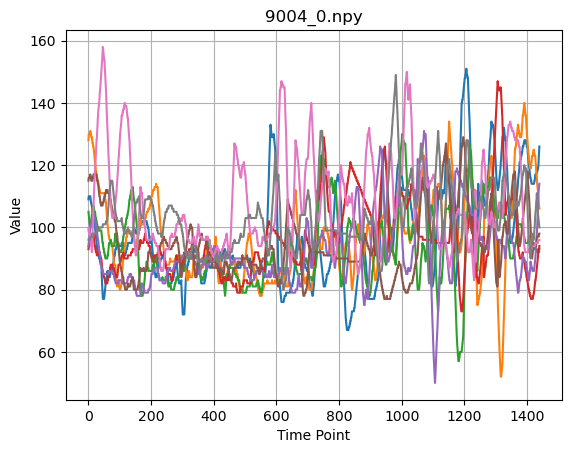

In [16]:
for file in os.listdir("Shah2019"):
    data = np.load(os.path.join("Shah2019", file))
    data = data.reshape(-1, 1440)
    plot_rows(data, file)

# end of visualization

In [17]:
# point estimation
def point_estimation(data):
    # reshape data into (1,-1)
    data = data.reshape(1, -1)

    # filter in data in 70-180
    tir_data = data[:, (data[0, :] >= 70) & (data[0, :] <= 180)]

    tbr_data = data[:, (data[0, :] < 70)]

    tar_data = data[:, (data[0, :] > 180)]

    tir_ratio = tir_data.shape[1] / data.shape[1] * 100

    tbr_ratio = tbr_data.shape[1] / data.shape[1] * 100

    tar_ratio = tar_data.shape[1] / data.shape[1] * 100

    mean = np.mean(tir_data)
    std = np.std(tir_data)

    return tir_ratio, tbr_ratio, tar_ratio, mean, std

In [27]:
original_estimator = {
    "tir_ratio": [],
    "tbr_ratio": [],
    "tar_ratio": [],
    "mean": [],
    "std": [],
}

aug_estimator = {
    "tir_ratio": [],
    "tbr_ratio": [],
    "tar_ratio": [],
    "mean": [],
    "std": [],
}

In [30]:
for file in os.listdir("Hall2018_rgw"):

    data1 = np.load(os.path.join("Hall2018_rgw", file))

    data2 = np.load(os.path.join("Hall2018", file))

    tir1_ratio, tbr1_ratio, tar1_ratio, mean1, std1 = point_estimation(data1)

    aug_estimator["tir_ratio"].append(tir1_ratio)

    aug_estimator["tbr_ratio"].append(tbr1_ratio)

    aug_estimator["tar_ratio"].append(tar1_ratio)

    aug_estimator["mean"].append(mean1)

    aug_estimator["std"].append(std1)

    tir2_ratio, tbr2_ratio, tar2_ratio, mean2, std2 = point_estimation(data2)

    original_estimator["tir_ratio"].append(tir2_ratio)

    original_estimator["tbr_ratio"].append(tbr2_ratio)

    original_estimator["tar_ratio"].append(tar2_ratio)

    original_estimator["mean"].append(mean2)

    original_estimator["std"].append(std1)

In [31]:
for file in os.listdir("Shah2019_rgw"):

    data1 = np.load(os.path.join("Shah2019_rgw", file))

    data2 = np.load(os.path.join("Shah2019", file))

    tir1_ratio, tbr1_ratio, tar1_ratio, mean1, std1 = point_estimation(data1)

    aug_estimator["tir_ratio"].append(tir1_ratio)

    aug_estimator["tbr_ratio"].append(tbr1_ratio)

    aug_estimator["tar_ratio"].append(tar1_ratio)

    aug_estimator["mean"].append(mean1)

    aug_estimator["std"].append(std1)

    tir2_ratio, tbr2_ratio, tar2_ratio, mean2, std2 = point_estimation(data2)

    original_estimator["tir_ratio"].append(tir2_ratio)

    original_estimator["tbr_ratio"].append(tbr2_ratio)

    original_estimator["tar_ratio"].append(tar2_ratio)

    original_estimator["mean"].append(mean2)

    original_estimator["std"].append(std2)

In [33]:
for file in os.listdir("Colas2019_time_warp_magnitude_warp_rgw"):
    data1 = np.load(os.path.join("Colas2019_time_warp_magnitude_warp_rgw", file))
    data2 = np.load(os.path.join("Colas2019_time_warp_magnitude_warp", file))

    tir1_ratio, tbr1_ratio, tar1_ratio, mean1, std1 = point_estimation(data1)
    aug_estimator["tir_ratio"].append(tir1_ratio)
    aug_estimator["tbr_ratio"].append(tbr1_ratio)
    aug_estimator["tar_ratio"].append(tar1_ratio)
    aug_estimator["mean"].append(mean1)
    aug_estimator["std"].append(std1)

    tir2_ratio, tbr2_ratio, tar2_ratio, mean2, std2 = point_estimation(data2)
    original_estimator["tir_ratio"].append(tir2_ratio)
    original_estimator["tbr_ratio"].append(tbr2_ratio)
    original_estimator["tar_ratio"].append(tar2_ratio)
    original_estimator["mean"].append(mean2)
    original_estimator["std"].append(std2)

In [19]:
def plot_scatter(x, y):
    plt.scatter(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter Plot")
    plt.show()

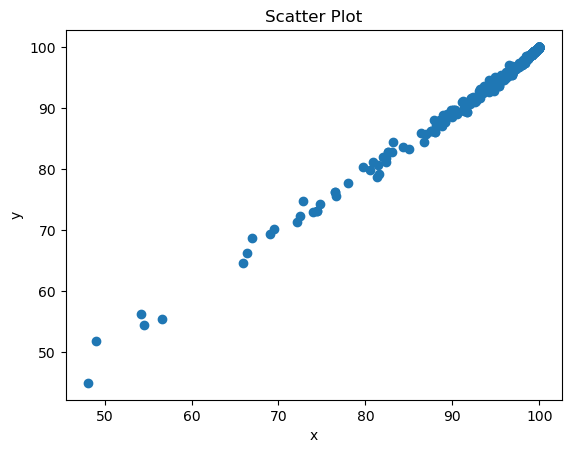

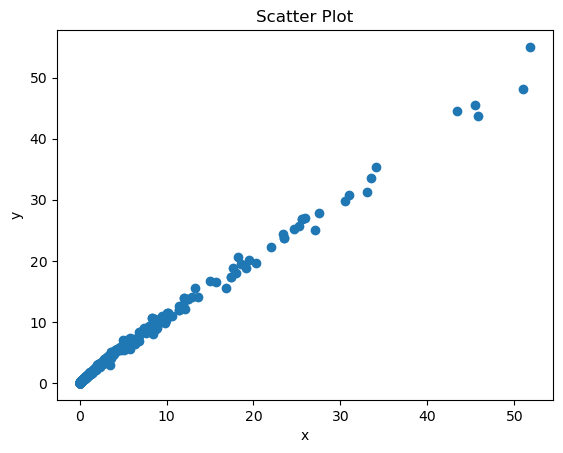

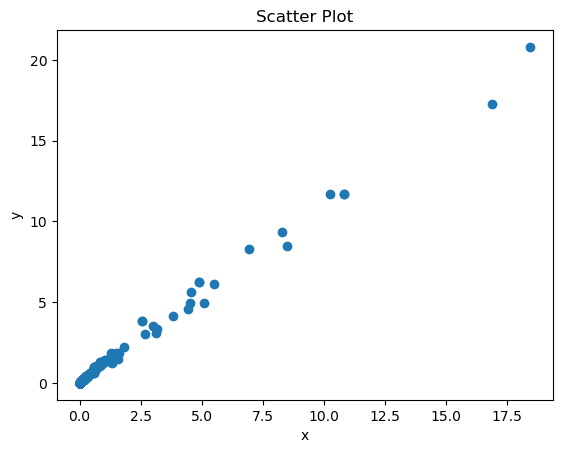

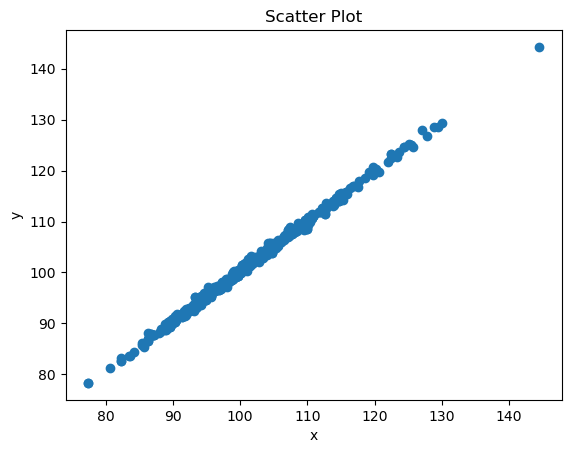

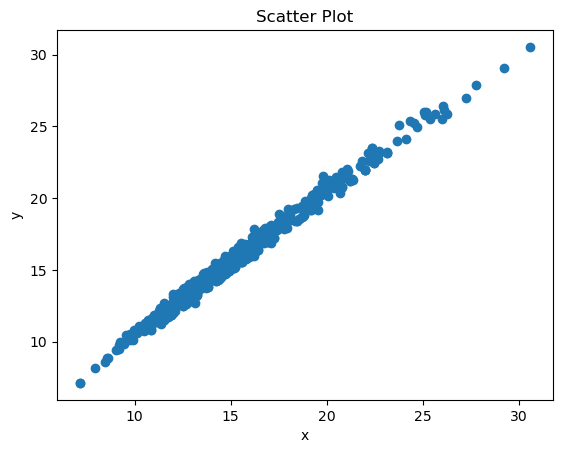

In [34]:
for aug, original in zip(aug_estimator.values(), original_estimator.values()):
    plot_scatter(aug, original)

In [23]:
normal_generator_base = ["Colas2019_time_warp_magnitude_warp", "Hall2018", "Shah2019"]

In [51]:
normal_generator = ["rgw"]

In [52]:
from concurrent.futures import ProcessPoolExecutor
from multiprocess_test import seperate_generator

if __name__ == "__main__":
    # call process_generator_parrallelly for each folder
    try:

        with ProcessPoolExecutor() as executor:

            executor.map(
                seperate_generator,
                normal_generator_base,
                [normal_generator] * len(normal_generator_base),
            )

    except Exception as e:
        logging.error(f"Error processing outside: {e}")
        raise

In [2]:
from time_series_augmentation.utils import augmentation